In [25]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import csv
import sys

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')
sb.set()

In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\Body signal of smoking\smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
df.shape

(55692, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
ID                     55692 non-null int64
gender                 55692 non-null object
age                    55692 non-null int64
height(cm)             55692 non-null int64
weight(kg)             55692 non-null int64
waist(cm)              55692 non-null float64
eyesight(left)         55692 non-null float64
eyesight(right)        55692 non-null float64
hearing(left)          55692 non-null float64
hearing(right)         55692 non-null float64
systolic               55692 non-null float64
relaxation             55692 non-null float64
fasting blood sugar    55692 non-null float64
Cholesterol            55692 non-null float64
triglyceride           55692 non-null float64
HDL                    55692 non-null float64
LDL                    55692 non-null float64
hemoglobin             55692 non-null float64
Urine protein          55692 non-null float64
serum creatinine       556

In [5]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [7]:
df.describe().round()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0,55692.0
mean,27846.0,44.0,165.0,66.0,82.0,1.0,1.0,1.0,1.0,121.0,76.0,99.0,197.0,127.0,57.0,115.0,15.0,1.0,1.0,26.0,27.0,40.0,0.0,0.0
std,16077.0,12.0,9.0,13.0,9.0,0.0,0.0,0.0,0.0,14.0,10.0,21.0,36.0,72.0,15.0,41.0,2.0,0.0,0.0,19.0,31.0,50.0,0.0,0.0
min,0.0,20.0,130.0,30.0,51.0,0.0,0.0,1.0,1.0,71.0,40.0,46.0,55.0,8.0,4.0,1.0,5.0,1.0,0.0,6.0,1.0,1.0,0.0,0.0
25%,13923.0,40.0,160.0,55.0,76.0,1.0,1.0,1.0,1.0,112.0,70.0,89.0,172.0,74.0,47.0,92.0,14.0,1.0,1.0,19.0,15.0,17.0,0.0,0.0
50%,27846.0,40.0,165.0,65.0,82.0,1.0,1.0,1.0,1.0,120.0,76.0,96.0,195.0,108.0,55.0,113.0,15.0,1.0,1.0,23.0,21.0,25.0,0.0,0.0
75%,41768.0,55.0,170.0,75.0,88.0,1.0,1.0,1.0,1.0,130.0,82.0,104.0,220.0,160.0,66.0,136.0,16.0,1.0,1.0,28.0,31.0,43.0,0.0,1.0
max,55691.0,85.0,190.0,135.0,129.0,10.0,10.0,2.0,2.0,240.0,146.0,505.0,445.0,999.0,618.0,1860.0,21.0,6.0,12.0,1311.0,2914.0,999.0,1.0,1.0


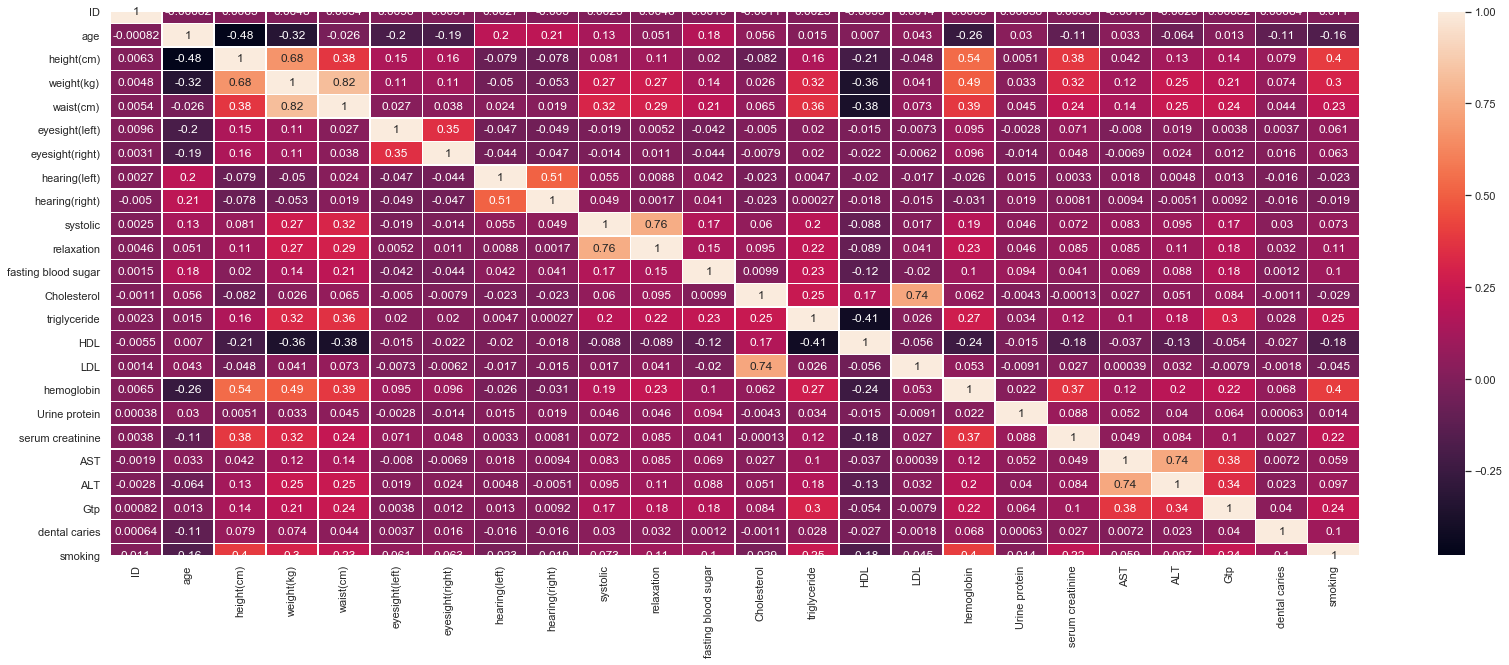

In [12]:
plt.figure(figsize = (28, 10))
sb.heatmap(df.corr(), annot = True, linewidths = 0.5)

In [13]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


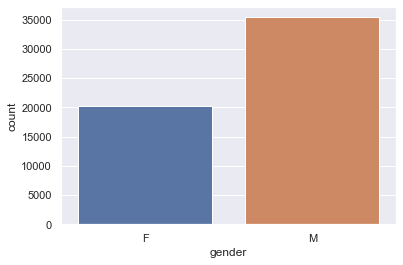

In [14]:
sb.countplot(df['gender'])

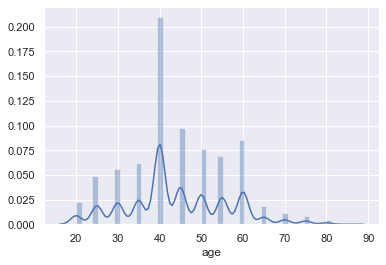

In [15]:
sb.distplot(df['age'])

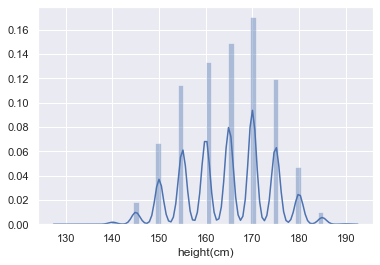

In [18]:
sb.distplot(df['height(cm)'])

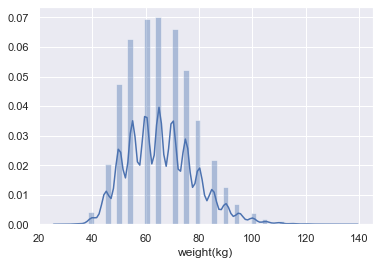

In [19]:
sb.distplot(df['weight(kg)'])

### Feature Engineering

In [20]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [27]:
x = df.drop(df['smoking'])
y = df['smoking']

le = LabelEncoder()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('x_train', x_train.shape)
print('x_train', x_train.shape)
print('y_test', y_test.shape)
print('y_test', y_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [55690, 55692]